<a href="https://colab.research.google.com/github/carson-edmonds/AAI-521-Sports-Image-Classification/blob/main/Dataset_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pre-processing

In [16]:
!pip install -q kaggle
!pip install -q patool


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import requests
from PIL import Image
from io import BytesIO
import random
import pickle
from sklearn.model_selection import train_test_split
import patoolib

# Data visualization
import seaborn as sns
import numpy as np
import pandas as pd
# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from google.colab import files
# get api key from kaggle
# upload kaggle.json that was generated from kaggle
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rishikeshkonapure/sports-image-dataset/
! mkdir kaggle_data
! unzip /content/sports-image-dataset.zip -d kaggle_data
data_dir = '/content/kaggle_data/data'

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#pre-process resize, etc.

In [4]:
categories = ["badminton", "baseball", "basketball", "boxing",
                "chess", "cricket", "fencing", "football", "formula1",
                "gymnastics", "hockey", "ice_hockey", "kabaddi", "motogp",
                "shooting", "swimming", "table_tennis", "tennis", "volleyball",
                "weight_lifting", "wrestling", "wwe"]

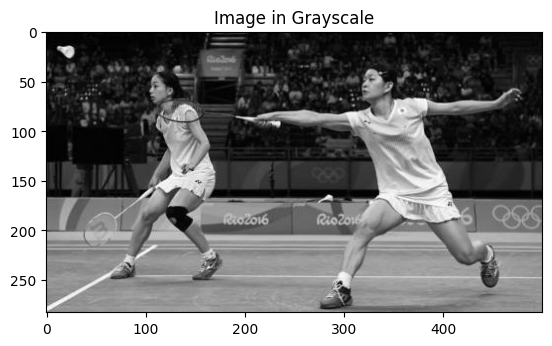

In [10]:
for i in categories:
    path = os.path.join(data_dir,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.title('Image in Grayscale')
        plt.show()
        break
    break

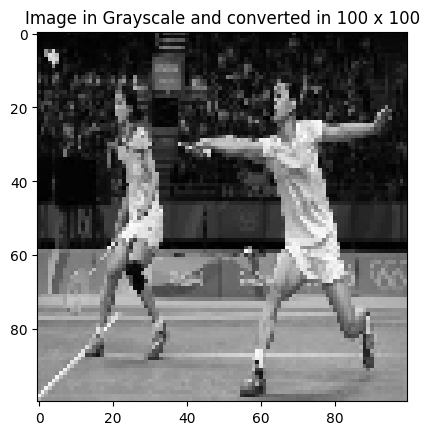

In [11]:
img_size = 100

new_array = cv2.resize(img_array,(img_size,img_size)) # resize images with grayscale into 100 * 100
plt.imshow(new_array,cmap='gray')
plt.title('Image in Grayscale and converted in 100 x 100')
plt.show()

In [23]:
#create training data

training_data =[]

def create_training_data():
    for i in categories:

        path = os.path.join(data_dir,i) #create path to sports types
        class_num = categories.index(i) #get the classification (indexing each category)
        print(class_num)
#check if any images are currupted
#if any skip the image
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array2 = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array2,class_num])

            except Exception as e:
                pass

create_training_data()
print(len(training_data))

0
1
2
3
4
5
6


KeyboardInterrupt: ignored

In [13]:
#shuffle all the training data
random.shuffle(training_data)
for sample in training_data[:5]:
    print(sample) #print first 5

[array([[115, 117, 119, ..., 109, 110, 110],
       [115, 117, 118, ..., 108, 109, 109],
       [115, 117, 117, ..., 107, 108, 108],
       ...,
       [111, 111, 119, ...,  97,  98, 106],
       [118, 116, 105, ...,  91,  99,  95],
       [125,  98, 116, ...,  99, 103, 103]], dtype=uint8), 7]
[array([[211, 204, 249, ..., 204, 251, 250],
       [203, 211, 249, ..., 204, 251, 250],
       [249, 249, 212, ..., 250, 205, 204],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 8]
[array([[162, 164, 165, ...,  59,  58,  57],
       [162, 164, 165, ...,  59,  58,  57],
       [163, 163, 165, ...,  59,  58,  57],
       ...,
       [208, 207, 204, ..., 217, 217, 216],
       [216, 215, 218, ..., 217, 217, 216],
       [217, 217, 218, ..., 218, 218, 217]], dtype=uint8), 17]
[array([[72, 74, 65, ..., 43, 47, 51],
       [71, 73, 65, ..., 31, 35, 39],
       [75, 76, 70, ..., 23, 26, 32],

In [ ]:
#creating lable and features

x=[] #features
y=[] #label
#y = np.array(y)

for features,label in training_data:
    x.append(features)
    y.append(label)
    np.array((y, label))

print("Before converting into numpy array:")
print(x[0].reshape(-1,img_size,img_size,1))

x=np.array(x).reshape(-1,img_size,img_size,1)

print("After converting into numpy array:")
print(np.array(x).reshape(-1,img_size,img_size,1))

y = np.array(y)
x = x/255.0
print(x)
print(y)

## Save with Pickle

In [ ]:
#Optional Save the x and y

In [ ]:
#dumping data into pickle file
#x_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/x.pickle'
#y_location = '/content/drive/MyDrive/Final_Project_AAI_521/data/y.pickle'

#pickle file for features
#pickle_out = open(x_location,"wb") #path to save pickle file
#pickle.dump(x,pickle_out)
#pickle_out.close()

#pickle file for label
#pickle_out = open(y_location,"wb") #path to save pickle file
#pickle.dump(y,pickle_out)
#pickle_out.close()

In [ ]:
#importing data (pickle) files x and y
#pickle_in = open(x_location,"rb")   #rb - read binary form #wb - Write binary form
#x = pickle.load(pickle_in)


#pickle_in = open(y_location,"rb")   #rb - read binary form #wb - Write binary form
#y = pickle.load(pickle_in)

## Train Test Split

In [25]:
#create a split of data for the model fit and training
train_x,test_x, train_y,test_y = train_test_split(x,y,test_size=0.2)

In [36]:
print(train_x.shape)
print(train_y.shape)


print(test_x.shape)
print(test_y.shape)

print(type(test_x[0]), type(test_x[1]))
print(test_x[0])

print(type(train_y[0]), type(train_y[1]))
print(test_y[0])

test_y_cat = to_categorical(test_y)
train_y_cat = to_categorical(train_y)
print("one hot encoded for categorial")
print(train_y_cat[0])
print(len(train_y_cat[0]))

(3400, 100, 100, 1)
(3400,)
(850, 100, 100, 1)
(850,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[[0.14117647]
  [0.15686275]
  [0.17647059]
  ...
  [0.23921569]
  [0.23529412]
  [0.23529412]]

 [[0.15294118]
  [0.16862745]
  [0.18823529]
  ...
  [0.19607843]
  [0.19215686]
  [0.18823529]]

 [[0.16078431]
  [0.17254902]
  [0.20784314]
  ...
  [0.18431373]
  [0.17647059]
  [0.18039216]]

 ...

 [[0.65490196]
  [0.64705882]
  [0.63921569]
  ...
  [0.98431373]
  [0.97254902]
  [0.89803922]]

 [[0.69803922]
  [0.68235294]
  [0.64705882]
  ...
  [1.        ]
  [0.90196078]
  [0.8627451 ]]

 [[0.74509804]
  [0.7372549 ]
  [0.7254902 ]
  ...
  [0.97647059]
  [0.8745098 ]
  [0.88235294]]]
<class 'numpy.int64'> <class 'numpy.int64'>
6
one hot encoded for categorial
[0. 1. 0. 0. 0. 0. 0.]
7


##Object Detection

In [ ]:
#Clone yolo 8 and check all dependencies
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.8/78.2 GB disk)


In [ ]:
#Train YOLO8 model
from ultralytics import YOLO
model = YOLO("yolov8n.yaml")
model = YOLO("yolov8n.pt")
model.train(data="coco128.yaml", epochs=3, verbose=False)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 6.66M/6.66M [00:00<00:00, 132MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 2786.98file/s]

Dataset download success ✅ (1.3s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 28.3MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 2345.34it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3       2.8G      1.152      1.595      1.249        228        640: 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        128        929       0.66      0.527      0.598      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3       2.6G      1.142      1.376      1.218        151        640: 100%|██████████| 8/8 [00:03<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        128        929      0.683      0.539      0.616      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.55G       1.15      1.313      1.226        164        640: 100%|██████████| 8/8 [00:02<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        128        929      0.675      0.548      0.632      0.467



3 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]


                   all        128        929       0.67      0.549      0.631      0.467
Speed: 0.5ms preprocess, 4.5ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c11db6e3d60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [ ]:
#Test model on images from test dataset
from IPython.display import Image
metrics = model.val()

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.21s/it]


                   all        128        929      0.665      0.546      0.625      0.463
Speed: 1.4ms preprocess, 6.4ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train4


In [ ]:
def obj_det(image_path):
  results = model(source=image_path,save=True, save_txt=True, project='runs/detect', name='predict', exist_ok=True)
  N = 12
  img_numb = image_path[-N:]
  return Image(filename='/content/runs/detect/predict/'+img_numb,width=600)

Results saved to runs/detect/predict
4 labels saved to runs/detect/predict/labels


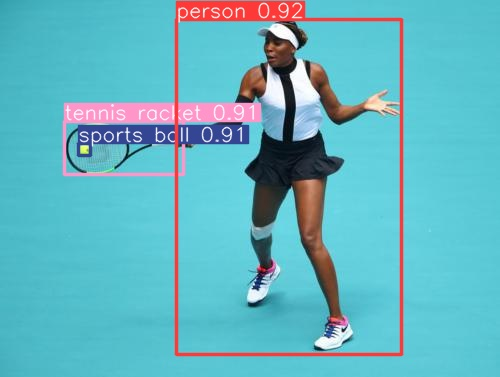

In [ ]:
obj_det('/content/kaggle_data/data/tennis/00000007.jpg')

Results saved to runs/detect/predict
4 labels saved to runs/detect/predict/labels


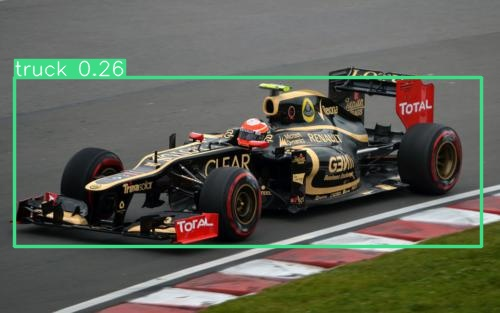

In [ ]:
obj_det('/content/kaggle_data/data/formula1/00000023.jpg')

Results saved to runs/detect/predict
4 labels saved to runs/detect/predict/labels


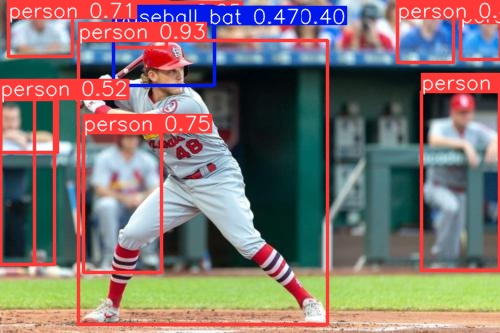

In [ ]:
obj_det('/content/kaggle_data/data/baseball/00000028.jpg')

Results saved to runs/detect/predict
4 labels saved to runs/detect/predict/labels


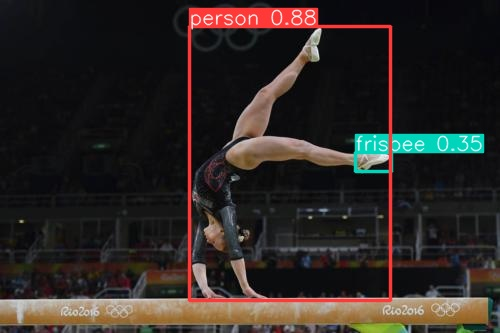

In [ ]:
obj_det('/content/kaggle_data/data/gymnastics/00000055.jpg')

#Building Classification model

In [28]:
# x = np.array(x).reshape(-1, image_size, image_size, 1)  # Reshape the input data

# Assuming you have a function to_categorical to convert labels to one-hot encoding
# If not, you can use `tf.keras.utils.to_categorical` from TensorFlow

# Convert labels to one-hot encoding
# y = to_categorical(y)

# print(y[0])

model = Sequential()
model.add(Flatten(input_shape=(img_size, img_size, 4)))  # Flatten the input
model.add(Dense(100, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))


model.compile(Adam(learning_rate=0.01), "categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y_cat, verbose=1, epochs=10)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 40000)             0         
                                                                 
 dense_12 (Dense)            (None, 100)               4000100   
                                                                 
 dense_13 (Dense)            (None, 15)                1515      
                                                                 
 dropout_4 (Dropout)         (None, 15)                0         
                                                                 
 dense_14 (Dense)            (None, 4)                 64        
                                                                 
Total params: 4001679 (15.27 MB)
Trainable params: 4001679 (15.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


ValueError: ignored

In [21]:


model = Sequential()
model.add(Dense(100, input_shape = (33,), activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "softmax"))
model.compile(Adam(learning_rate = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               3400      
                                                                 
 dense_9 (Dense)             (None, 15)                1515      
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_10 (Dense)            (None, 4)                 64        
                                                                 
Total params: 4979 (19.45 KB)
Trainable params: 4979 (19.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(train_x, train_y, verbose=1, epochs=10)

Epoch 1/10


ValueError: ignored

In [ ]:
y_pred_class = model.predict_classes(x_test)

y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test_class, y_pred_class)